In [1]:
import numpy as np
import random
from IPython.display import display
import matplotlib.pyplot as plt

<module 'matplotlib.pyplot' from 'C:\\Users\\e-luisalopez\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

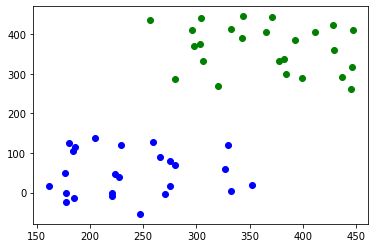

In [2]:
n = 50 # 50 muestras aleatorias
# generamos dos centros para las dos clases de puntos para entrenamiento 
c1 = [random.randint(0,1000), random.randint(0,1000)]
c2 = [random.randint(0,1000), random.randint(0,1000)]
# generamos las muestras aleatorias alrededor de los centros
tuplasC1 = []
tuplasC2 = []
labelsC1 = []
labelsC2 = []
for i in range(int(n/2)):
    tuplasC1.append([c1[0] + random.randint(-100,100), c1[1] + random.randint(-100,100)])
    labelsC1.append(0)
    tuplasC2.append([c2[0] + random.randint(-100,100), c2[1] + random.randint(-100,100)])
    labelsC2.append(1)
 
labels = labelsC1 + labelsC2
puntos = np.matrix(tuplasC1 + tuplasC2)
# dibujamos los puntos
plt.scatter([puntos[:int(n/2),0]], [puntos[:int(n/2),1]], c="b")
plt.scatter([puntos[int(n/2):,0]], [puntos[int(n/2):,1]], c="g")
display(plt)

<module 'matplotlib.pyplot' from 'C:\\Users\\e-luisalopez\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

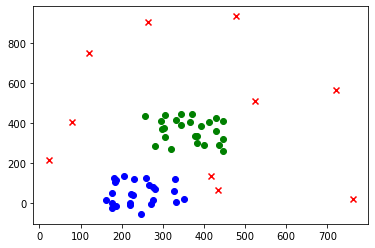

In [3]:
# generamos puntos aleatorios nuevos para clasificarlos
n_test = 10
tuplas = []
for i in range(n_test):
    tuplas.append([random.randint(0,1000), random.randint(0,1000)])
    
puntos_test = np.matrix(tuplas)
# dibujamos los nuevos puntos junto con los anteriores
plt.scatter([puntos[:int(n/2),0]], [puntos[:int(n/2),1]], c="b")
plt.scatter([puntos[int(n/2):,0]], [puntos[int(n/2):,1]], c="g")
plt.scatter([puntos_test[:,0]], [puntos_test[:,1]], c='r', marker='x')
display(plt)

In [4]:
# usamos KNN para clasificar los nuevos puntos
k = 5 # número de vecinos
 
pred_label = []
# clasificamos cada uno de los puntos nuevos
for i in range(puntos_test.shape[0]):
    distances = []
    # por cada punto calculamos la distancia con los puntos de entrenamiento 
    for j in range(puntos.shape[0]):
        dist = np.sqrt(np.sum(np.square(puntos[j] - puntos_test[i])))
        distances.append((dist, labels[j])) # guardamos las etiquetas y la distancia
 
    # ordenamos por distancia y nos quedamos con los k vecinos más cercanos
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    # contamos los votos para ver qué etiqueta gana
    votes = [0,0]
    for neighbor in neighbors:
        votes[neighbor[1]] = votes[neighbor[1]] + 1
    # obtenemos la etiqueta ganadora
    pred_label.append(votes.index(max(votes)))

<module 'matplotlib.pyplot' from 'C:\\Users\\e-luisalopez\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

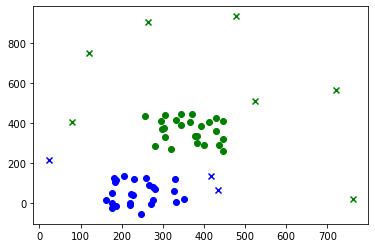

In [5]:
# separar los datos clasificados para dibujarlos
g0 = []
g1 = []
for i in range(len(pred_label)):
    if pred_label[i] == 0:
        g0.append([puntos_test[i,0], puntos_test[i,1]])
    else:
        g1.append([puntos_test[i,0], puntos_test[i,1]])
        
grupo0 = np.matrix(g0)
grupo1 = np.matrix(g1)
 
# mostrar datos ya clasificados
plt.scatter([puntos[:int(n/2),0]], [puntos[:int(n/2),1]], c="b")
plt.scatter([puntos[int(n/2):,0]], [puntos[int(n/2):,1]], c="g")
plt.scatter([grupo0[:,0]], [grupo0[:,1]], c='b', marker='x')
plt.scatter([grupo1[:,0]], [grupo1[:,1]], c='g', marker='x')
display(plt) 